In [1]:
import pandas as pd
import matplotlib
from matplotlib import pylab as plt


df=pd.read_csv("casestudy.csv")
temp=df.iloc[: , 1:]

In [2]:
df

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


Performing some EDA

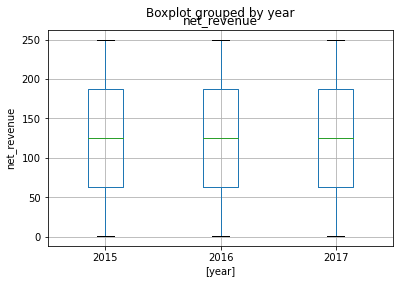

In [10]:
df[['net_revenue','year']].boxplot(by='year')
plt.ylabel('net_revenue')
plt.show()

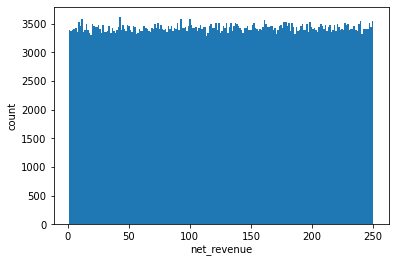

In [3]:
df['net_revenue'].plot.hist(bins=200) 
plt.xlabel('net_revenue')
plt.ylabel('count')
plt.show()

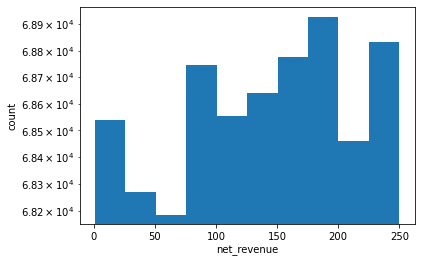

In [31]:
df['net_revenue'].plot.hist() 
#plt.semilogx()
plt.semilogy()
plt.xlabel('net_revenue')
plt.ylabel('count')
plt.show()

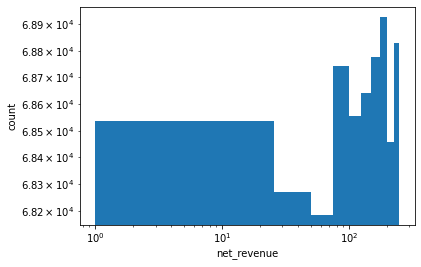

In [6]:
df['net_revenue'].plot.hist() 
plt.semilogx()
plt.semilogy()
plt.xlabel('net_revenue')
plt.ylabel('count')
plt.show()

Answering the questions

In [11]:
print("Total number of revenue for each year")
temp.groupby(['year']).sum()

Total number of revenue for each year


,net_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


In [12]:
d2015={}
d2016={}
d2017={}
temp.sort_values(by=['year'])
df2015 = temp[temp['year'] == 2015]
df2016 = temp[temp['year'] == 2016]
df2017 = temp[temp['year'] == 2017]

In [13]:
s2016=0
s2017=0
print("Since there is no previous year for 2015, every customer in 2015 is a new customer")
print("New customer revenue for 2015:-" ,df2015["net_revenue"].sum().round())
for index, row in df2015.iterrows():
    if row['customer_email'] not in d2015 :
        d2015[row['customer_email']]=row["net_revenue"]
    else:
        d2015[row['customer_email']]+=row["net_revenue"]
        
for index, row in df2016.iterrows():
    if row['customer_email'] not in d2015 :
        s2016+=row["net_revenue"]
    if row['customer_email'] not in d2016 :
        d2016[row['customer_email']]=row["net_revenue"]
    else:
        d2016[row['customer_email']]+=row["net_revenue"]
print("New customer revenue for 2016:- ",round(s2016))
for index, row in df2017.iterrows():
    if row['customer_email'] not in d2016 :
        s2017+=row["net_revenue"]
    if row['customer_email'] not in d2017 :
        d2017[row['customer_email']]=row["net_revenue"]
    else:
        d2017[row['customer_email']]+=row["net_revenue"]
print("New customer revenue for 2017:- ",round(s2017))

Since there is no previous year for 2015, every customer in 2015 is a new customer
New customer revenue for 2015:- 29036749.0
New customer revenue for 2016:-  18245491
New customer revenue for 2017:-  28776235


In [14]:
s=0
for i in d2016:
    if i in d2015 :
        s+=d2016[i]-d2015[i]
print("Existing customer growth for 2016:- ",round(s))
s=0
for i in d2017:
    if i in d2016 :
        s+=d2017[i]-d2016[i]     
print("Existing customer growth for 2017:- ",round(s))
print("Here we can see that in the year 2017, there has not been any growth, instead there has been a loss")

Existing customer growth for 2016:-  20335
Existing customer growth for 2017:-  20611
Here we can see that in the year 2017, there has not been any growth, instead there has been a loss


In [15]:
s=0
for i in d2016:
    if i in d2015 :
        s+=d2016[i]
print("Existing Customer Revenue for 2016:- ",round(s))
s=0
for i in d2017:
    if i in d2016 :
        s+=d2017[i]
print("Existing Customer Revenue for 2017:- ",round(s))

Existing Customer Revenue for 2016:-  7485453
Existing Customer Revenue for 2017:-  2641260


In [16]:
s=0
for i in d2016:
    if i in d2015 :
        s+=d2015[i]
print("Existing Customer Revenue of prior year for 2016:- ",round(s))
s=0
for i in d2017:
    if i in d2016 :
        s+=d2016[i]
print("Existing Customer Revenue for prior year 2017:- ",round(s))

Existing Customer Revenue of prior year for 2016:-  7465117
Existing Customer Revenue for prior year 2017:-  2620649


In [17]:
print("Total customers for 2015:- ",sum([1 for i in d2015.keys()]))
print("Total customers for 2016:- ",sum([1 for i in d2016.keys()]))
print("Total customers for 2017:- ",sum([1 for i in d2017.keys()]))

Total customers for 2015:-  231294
Total customers for 2016:-  204646
Total customers for 2017:-  249987


In [18]:
s=0
for i in d2016:
    if i not in d2015 :
        s+=1        
print("Total new customers for 2016:- ",s)
s=0
for i in d2017:
    if i not in d2016 :
        s+=1
print("Total new customers for 2017:- ",s)

Total new customers for 2016:-  145062
Total new customers for 2017:-  229028


In [19]:
s=0
for i in d2015:
    if i not in d2016 :
        s+=1        
print("Total customers lost for 2016:- ",s)
s=0
for i in d2016:
    if i not in d2017 :
        s+=1
print("Total customers lost for 2017:- ",s)

Total customers lost for 2016:-  171710
Total customers lost for 2017:-  183687
